# SMOTE로 DATA 불균형 해결하기!

## ✔ Data 설명
### Credit Card Fraud Detection Data
- 28 컬럼으로 구성
- 타겟변수 (이진 분류 : 0, 1)

## STEP1. 모듈 & DATASET 

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./creditcard.csv')

## STEP2. EDA

In [3]:
data.shape

(284807, 31)

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [6]:
data.isnull().any()

V1       False
V2       False
V3       False
V4       False
V5       False
V6       False
V7       False
V8       False
V9       False
V10      False
V11      False
V12      False
V13      False
V14      False
V15      False
V16      False
V17      False
V18      False
V19      False
V20      False
V21      False
V22      False
V23      False
V24      False
V25      False
V26      False
V27      False
V28      False
Class    False
dtype: bool

In [7]:
data.shape

(284807, 29)

In [8]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,...,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


In [10]:
# 종속 변수의 분포 확인
from collections import Counter
Counter(data.Class)

Counter({0: 284315, 1: 492})

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

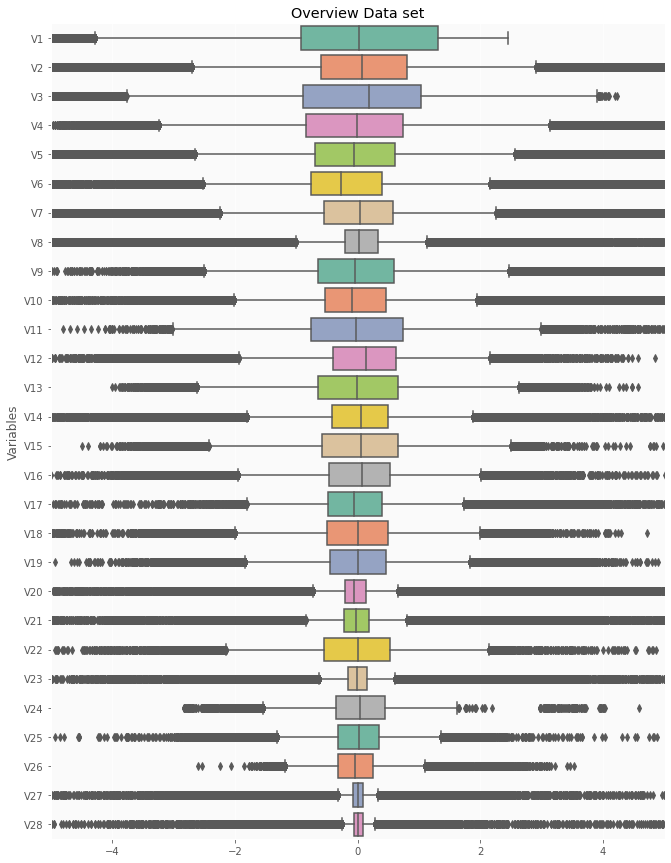

In [12]:
plt.style.use('ggplot')
f, ax = plt.subplots(figsize = (11, 15))
ax.set_facecolor('#fafafa')
ax.set(xlim = (-5, 5))
plt.ylabel('Variables')
plt.title('Overview Data set')
ax = sns.boxplot(data=data.drop(columns=['Class']), orient = 'h', palette = 'Set2')

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
var = data.columns.values[:-1]
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]

<Figure size 432x288 with 0 Axes>

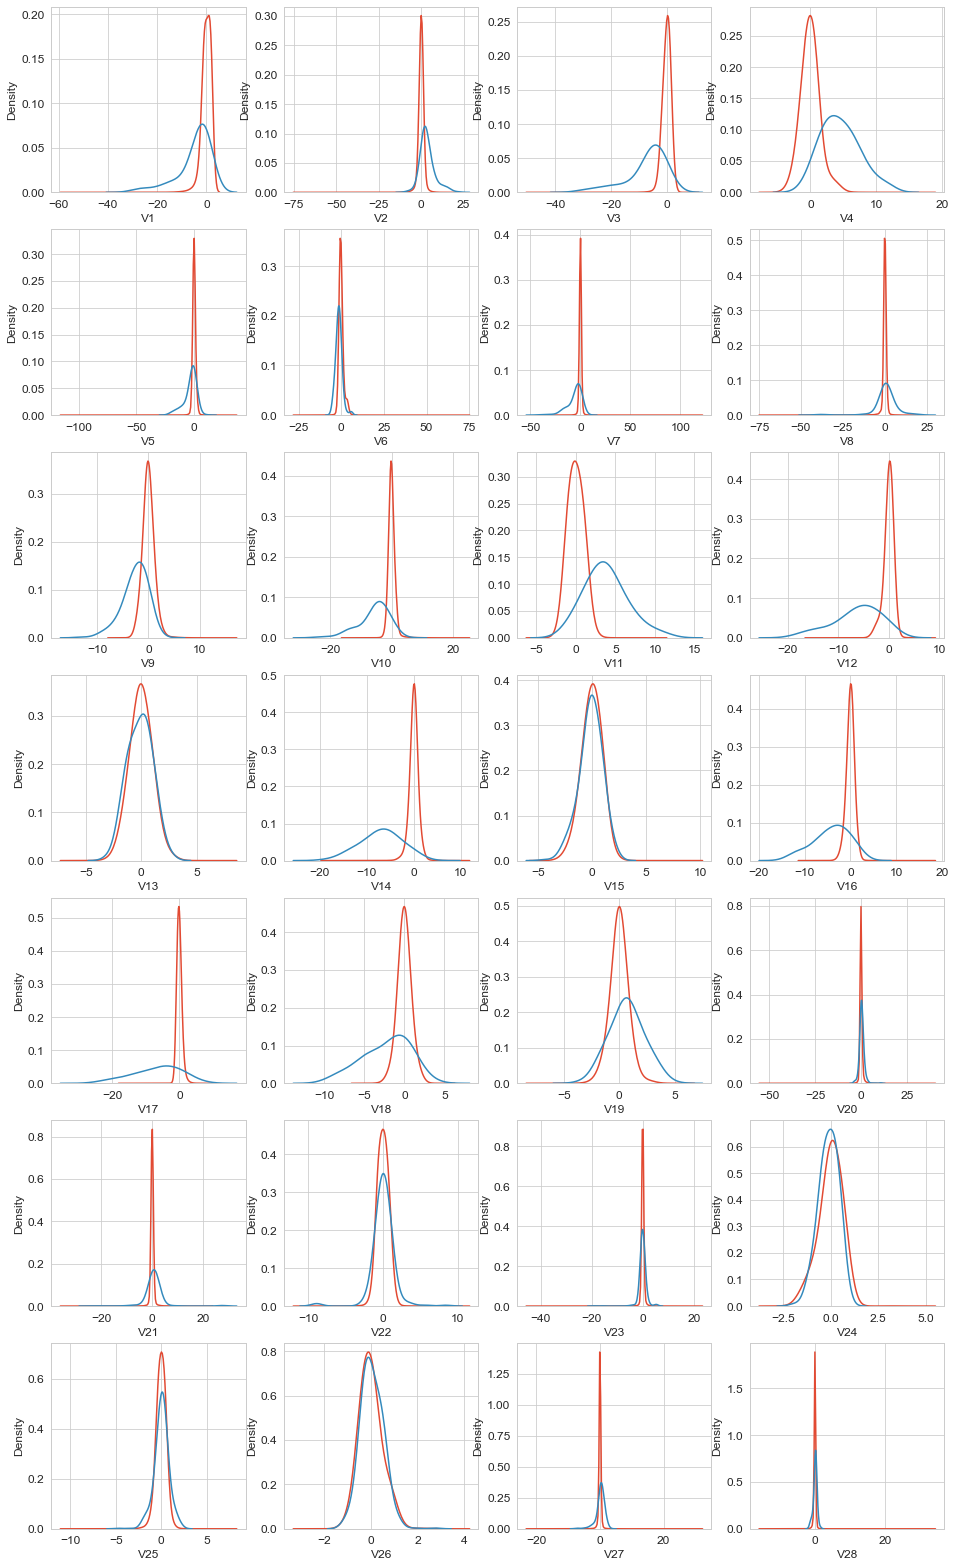

In [21]:
i = 0
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8, 4, figsize=(16, 28))
for feature in var:
    i += 1
    plt.subplot(7, 4, i)
    sns.kdeplot(t0[feature], bw = 0.5, label = 'Class = 0')
    sns.kdeplot(t1[feature], bw = 0.5, label = 'Class = 1')
    plt.xlabel(feature, fontsize = 12)
    locs, labels = plt.xticks()
    plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.show()

## STEP3. 각 변수 별 그래프를 타겟변수에 대해서 그려보기! (차이가 있는 변수들)
- 타겟변수에 대해 분포 파이가 많이 나는 변수 : v4, V11
- 타겟변수에 대해 분포 차이가 비교적 많이 존재하는 변수 : V12, V14, V18
- 타겟변수에 대패 분포 파이가 비교적 적게 존재하는 변수 : V1, V2, V3, V10

In [22]:
X = np.array(data.iloc[:, data.columns != 'Class'])
y = np.array(data.iloc[:, data.columns == 'Class'])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
!conda install -c conda-forge lightgbm -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\admin\anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2020.07  |           py38_0           6 KB
    anaconda-custom            |           py38_1          36 KB
    beautifulsoup4-4.9.3       |     pyhb0f4dca_0          86 KB  conda-forge
    ca-certificates-2021.5.30  |       h5b45459_0         171 KB  conda-forge
    certifi-2021.5.30          |   py38haa244fe_0         142 KB  conda-forge
    gmpy2-2.1.0b5              |   py38hb63f22f_0         190 KB  conda-forge
    libllvm9-9.0.1             |       hab3b255_3          48 KB  conda-forge
    lightgbm-3.2.1             |   py38h885f38d_0         889 KB  conda-forge
    mpc-1.1.0                  |    h7edee0f_1009         322 KB  conda-forge
    mpfr-4.0.2             


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2021.05=py38_0
  - defaults/win-64::conda-build==3.21.4=py38haa95532_0
  - defaults/noarch::soupsieve==2.2.1=pyhd3eb1b0_0


In [26]:
from sklearn.metrics import confusion_matrix
import lightgbm as lgb

In [27]:
def model_evaluation(label, predict):
    cf_matrix = confusion_matrix(label, predict)
    Accuracy = (cf_matrix[0][0] + cf_matrix[1][1]) / sum(sum(cf_matrix))
    Precision = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[0][1])
    Recall = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[1][0])
    F1_Score = (2 * Recall * Precision) / (Recall + Precision)
    print('Model_Eavluation with Label : 1')
    print('Accuracy:', Accuracy)
    print('Precision:', Precision)
    print('Recall:', Recall)
    print('F1-Score:', F1_Score)

In [28]:
lgb_dtrain = lgb.Dataset(data = pd.DataFrame(X_train), label = pd.DataFrame(y_train))
lgb_param = {'max_depth': 10, #트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(pd.DataFrame(y_train))) + 1}
lgb_model = lgb.train(params=lgb_param, train_set=lgb_dtrain) # 학습
lgb_predict = np.argmax(lgb_model.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과 값 중 가장 큰값을 Label 예측
model_evaluation(y_test, lgb_predict)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 28
[LightGBM] [Info] Start training from score -0.001718
[LightGBM] [Info] Start training from score -6.367713
Model_Eavluation with Label : 1
Accuracy: 0.9991748885221726
Precision: 0.921875
Recall: 0.5841584158415841
F1-Score: 0.7151515151515151


In [30]:
!conda list imbalanced-learn

# packages in environment at C:\Users\admin\anaconda3:
#
# Name                    Version                   Build  Channel


In [ ]:
!conda install -c conda-forge imbalanced-learn -y

## STEP4. SMOTE을 이용한 Oversampling

In [36]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state= 0, sampling_strategy = 0.3)
X_train_res, y_train_res, = sm.fit_resample(X_train, y_train)

In [37]:
sum(y_train_res == 1), sum(y_train_res == 0)

(68236, 227454)

In [38]:
lgb_dtrain = lgb.Dataset(data = pd.DataFrame(X_train_res), label = pd.DataFrame(y_train_res))
lgb_param = {'max_depth': 10, #트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(pd.DataFrame(y_train))) + 1}
lgb_model = lgb.train(params=lgb_param, train_set=lgb_dtrain) # 학습
lgb_predict = np.argmax(lgb_model.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과 값 중 가장 큰값을 Label 예측
model_evaluation(y_test, lgb_predict)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 295690, number of used features: 28
[LightGBM] [Info] Start training from score -0.262364
[LightGBM] [Info] Start training from score -1.466339
Model_Eavluation with Label : 1
Accuracy: 0.9991222218320986
Precision: 0.7107438016528925
Recall: 0.8514851485148515
F1-Score: 0.7747747747747747


## ✔ Result
### Before 
- Model_Eavluation with Label : 1
- Accuracy: 0.9991748885221726
- Precision: 0.921875
- Recall: 0.5841584158415841
- F1-Score: 0.7151515151515151
    <br>
    
    </br>
### After
- Model_Eavluation with Label : 1
- Accuracy: 0.9991222218320986
- Precision: 0.7107438016528925
- Recall: 0.8514851485148515
- F1-Score: 0.7747747747747747